## Objective

Use CNN from Keras for handwriting recognition with mnist database.

In [17]:
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils
import matplotlib.pyplot as plt

## mnist database

In [2]:
# download input data
(x_train , y_train) , (x_test , y_test) = keras.datasets.mnist.load_data() ;

In [3]:
# reshape as (28,28,1) and normalize as 0~1
x_Train4D_normalize = x_train.reshape(x_train.shape[0] , 28 , 28 , 1).astype('float32') / 255
x_Test4D_normalize   = x_test.reshape(x_test.shape[0] , 28 , 28 , 1).astype('float32') / 255

# Onehot encoding
y_TrainOneHot = np_utils.to_categorical(y_train)
y_TestOneHot = np_utils.to_categorical(y_test)

## CNN model

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Dropout , Flatten , Conv2D , MaxPooling2D

In [39]:
model = Sequential()

In [42]:
# convolution1
model.add(Conv2D(filters = 16 , kernel_size = (5,5) , padding = 'same' , input_shape = (28,28,1) , activation = 'relu' ))
model.add(MaxPooling2D(pool_size = (2 , 2)))
# convolution2
model.add(Conv2D(filters = 36 , kernel_size = (5,5) , padding = 'same' , activation = 'relu' ))
model.add(MaxPooling2D(pool_size = (2 , 2)))

In [8]:
# dense1
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128 , activation = 'relu'))
# dense2
model.add(Dropout(0.5))
model.add(Dense(10 , activation = 'softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

## Train

**validation split**: 0.2  
**epoch**: 20  
**mini batch**: 300  

In [10]:
model.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [11]:
train_history = model.fit(x = x_Train4D_normalize , y = y_TrainOneHot , validation_split = 0.2 , epochs = 20 , batch_size = 300 , verbose = 2 )

Epoch 1/20
160/160 - 21s - loss: 0.4673 - accuracy: 0.8546 - val_loss: 0.1003 - val_accuracy: 0.9692
Epoch 2/20
160/160 - 21s - loss: 0.1319 - accuracy: 0.9614 - val_loss: 0.0643 - val_accuracy: 0.9808
Epoch 3/20
160/160 - 21s - loss: 0.0988 - accuracy: 0.9699 - val_loss: 0.0511 - val_accuracy: 0.9840
Epoch 4/20
160/160 - 21s - loss: 0.0774 - accuracy: 0.9772 - val_loss: 0.0459 - val_accuracy: 0.9862
Epoch 5/20
160/160 - 21s - loss: 0.0674 - accuracy: 0.9787 - val_loss: 0.0439 - val_accuracy: 0.9877
Epoch 6/20
160/160 - 22s - loss: 0.0588 - accuracy: 0.9822 - val_loss: 0.0378 - val_accuracy: 0.9895
Epoch 7/20
160/160 - 21s - loss: 0.0530 - accuracy: 0.9845 - val_loss: 0.0400 - val_accuracy: 0.9885
Epoch 8/20
160/160 - 22s - loss: 0.0454 - accuracy: 0.9856 - val_loss: 0.0380 - val_accuracy: 0.9887
Epoch 9/20
160/160 - 21s - loss: 0.0428 - accuracy: 0.9870 - val_loss: 0.0331 - val_accuracy: 0.9903
Epoch 10/20
160/160 - 21s - loss: 0.0388 - accuracy: 0.9883 - val_loss: 0.0338 - val_accura

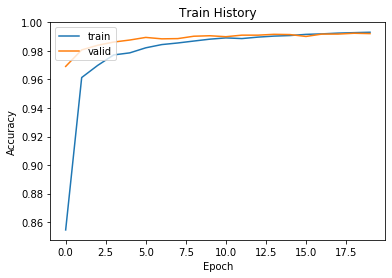

In [44]:
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title('Train History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

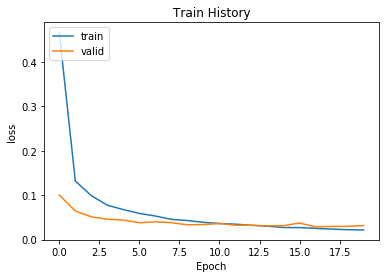

In [45]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Train History')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

## test accuracy ( = 99.28 %)

In [15]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

313/313 [==============================] - 1s 5ms/step - loss: 0.0219 - accuracy: 0.9928


0.9927999973297119

## confusion matrix

In [38]:
prediction = np.argmax(model.predict(x_Test4D_normalize), axis = 1 )
pd.crosstab(y_test , prediction , rownames = ['label'] , colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,974,0,3,0,0,0,1,1,1,0
1,0,1134,1,0,0,0,0,0,0,0
2,0,0,1031,0,0,0,0,1,0,0
3,0,0,1,1008,0,1,0,0,0,0
4,0,0,0,0,980,0,0,0,0,2
5,2,0,0,7,0,881,1,0,0,1
6,4,3,0,0,3,1,946,0,1,0
7,0,2,8,1,0,0,0,1016,1,0
8,1,0,3,2,0,0,0,2,965,1


## error samples (72 samples)

In [ ]:
df = pd.DataFrame({'label':y_test, 'predict':prediction})
idx = df[df.label != df.predict].index

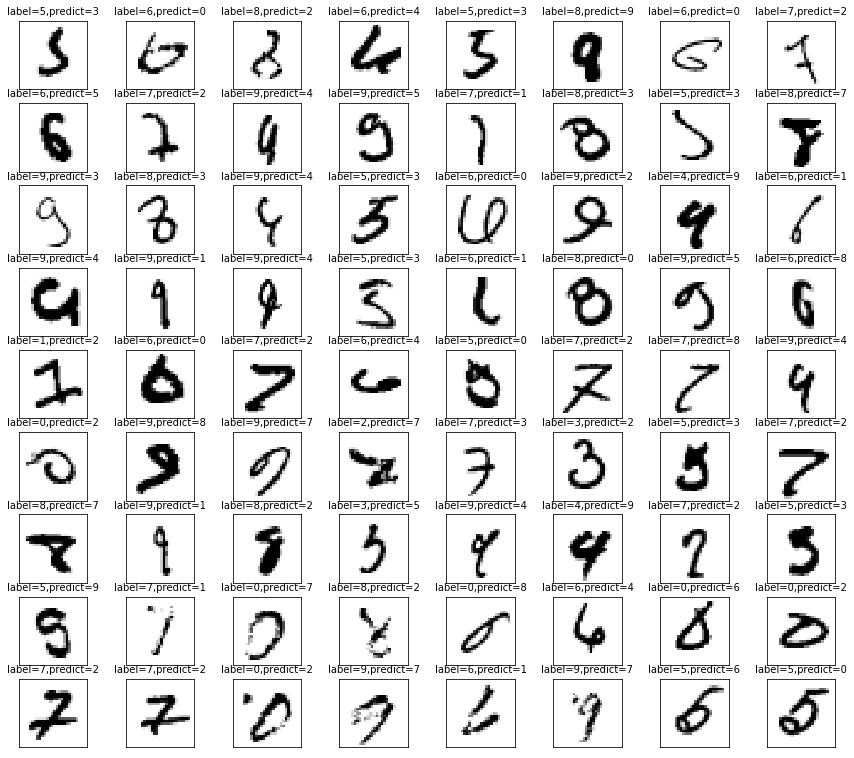

In [56]:
fig = plt.gcf()
fig.set_size_inches(15, 30)
num = 1
for i in idx :
    ax = plt.subplot(20 , 8 , num )
    ax.imshow(x_test[i] , cmap = 'binary')
    ax.set_title("label=" + str(y_test[i]) + ",predict=" + str(prediction[i]) , fontsize=10 ) 
    ax.set_xticks([]) ; ax.set_yticks([]) 
    num += 1

plt.show()

## Reference

https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC5-1%E8%AC%9B-%E5%8D%B7%E7%A9%8D%E7%A5%9E%E7%B6%93%E7%B6%B2%E7%B5%A1%E4%BB%8B%E7%B4%B9-convolutional-neural-network-4f8249d65d4f